# STA130 HW04
**Alexey Albert** \
Chat Logs:\
https://chatgpt.com/share/66ff67ea-6b70-800d-88df-ce88727088de

**(1).**

The standard error of the mean is how much the mean might fluctate if you keep bootstrapping/repeating the experiment. The standard deviation is how much the data spreads around the mean of the dataset/the variability around the mean. The standard error essentially shows us how much we can rely on the mean found by bootstrapping, while the standard deviation of the original data shows us how important/significant the mean is in comparison to the values surrounding it. So they're kind of similar but not the same.

**(2).**

Sort all the bootstrapped means and take the middle 95% of them, then calculate the standard error of the mean, then multiply it by 1.96 (for 95% confidence). This will give you a range that covers 95% of the bootstrapped sample means.

**(3).**

You just generate bootstrapped sample means by bootstrapping and repeatedly calculating the mean for each sample, then use `np.quantile()` to find the 0.025 and 0.975 quantiles, which will give you the 95% confidence interval.

**(4).**

ORIGINAL:

In [2]:
import numpy as np

# Step 1: Generate some sample data (could be replaced with actual data)
data = np.random.normal(10, 2, size=100)  # Example: Normally distributed data with mean=10, std=2

# Step 2: Define a function to calculate the bootstrap confidence interval
def bootstrap_confidence_interval(data, n_iterations=1000, confidence_level=0.95):
    # Create an array to store the means of each bootstrap sample
    boot_means = []
    
    # Perform bootstrapping: Generate new samples and calculate their means
    for _ in range(n_iterations):
        boot_sample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        boot_means.append(np.mean(boot_sample))  # Calculate mean of the bootstrap sample
    
    # Step 3: Calculate the desired quantiles for the confidence interval
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = 1 - lower_quantile
    ci_lower, ci_upper = np.quantile(boot_means, [lower_quantile, upper_quantile])
    
    return ci_lower, ci_upper

# Step 4: Use the function to calculate the 95% confidence interval
ci_lower, ci_upper = bootstrap_confidence_interval(data, n_iterations=1000, confidence_level=0.95)

# Step 5: Output the confidence interval
print(f"95% Bootstrapped Confidence Interval for the mean: ({ci_lower:.3f}, {ci_upper:.3f})")


95% Bootstrapped Confidence Interval for the mean: (9.762, 10.484)


ALTERED TO BE MEDIAN:

In [5]:
import numpy as np

# Step 1: Generate some sample data (could be replaced with actual data)
data = np.random.normal(10, 2, size=100)  # Example: Normally distributed data with mean=10, std=2

# Step 2: Define a function to calculate the bootstrap confidence interval
def bootstrap_confidence_interval(data, n_iterations=1000, confidence_level=0.95):
    # Create an array to store the median of each bootstrap sample
    boot_medians = []
    
    # Perform bootstrapping: Generate new samples and calculate their means
    for _ in range(n_iterations):
        boot_sample = np.random.choice(data, size=len(data), replace=True)  # Resample with replacement
        boot_medians.append(np.median(boot_sample))  # Calculate median of the bootstrap sample
    
    # Step 3: Calculate the desired quantiles for the confidence interval
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = 1 - lower_quantile
    ci_lower, ci_upper = np.quantile(boot_medians, [lower_quantile, upper_quantile])
    
    return ci_lower, ci_upper

# Step 4: Use the function to calculate the 95% confidence interval
ci_lower, ci_upper = bootstrap_confidence_interval(data, n_iterations=1000, confidence_level=0.95)

# Step 5: Output the confidence interval
print(f"95% Bootstrapped Confidence Interval for the median: ({ci_lower:.3f}, {ci_upper:.3f})")


95% Bootstrapped Confidence Interval for the median: (9.483, 10.151)


**(5).**

The population pararmeter is a value that we usually don't know, and so we try to estimate it using the sample statistic. By using the sample statistic, we can essentially get a pretty good guess at what the population parameter is, even though it would be impractical/unrealistic/impossible to acutally find the true precise population parameter. 

**(6).**

1. With bootstrapping, if you don't have enough data to make a sound/reasonable conclusion about data due to there not being enough data points, you can create new samples by randomly picking from the original data with replacement(you can pick the same entry more than once) and making new data sets. Then, from each one you might for example find the mean, and that way, you can see the distribution of the mean if you repeated the experiment tons of times without acutally going through the trouble.

2. Bootstrapping helps you understand how reliable your results are without needing to collect more data. Instead of running the experiment countless times with countlessly large sample sizes, you use the data you already have to simulate that process.

3. You could use bootstrapping to see how much the sample means vary and compare them to your hypothesized guess. If most of the bootstrapped means are close to your guess, it's probably plausible. But if your guess is far from the bulk of the bootstrapped means, it's less likely to be true.

**(7).**

A confidence interval overlapping zero means that zero is a plausible value for the true population effect (in this case, the drug’s impact). Even though the sample mean isn't zero, the fact that zero is inside the interval suggests that, on average, the drug might have no effect. We don't have a compelling enough argument that the medicine is doing anything. To reject the null hypothesis, the confidence interval can't include zero. This would mean that all plausible values for the population effect are either positive or negative, showing that the drug likely has some effect.

**(8).**

In [9]:
import pandas as pd

# Creating the vaccine data as a CSV file
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

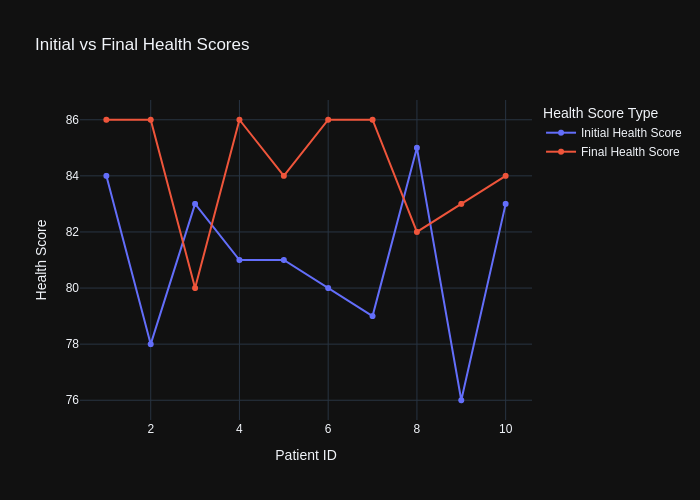

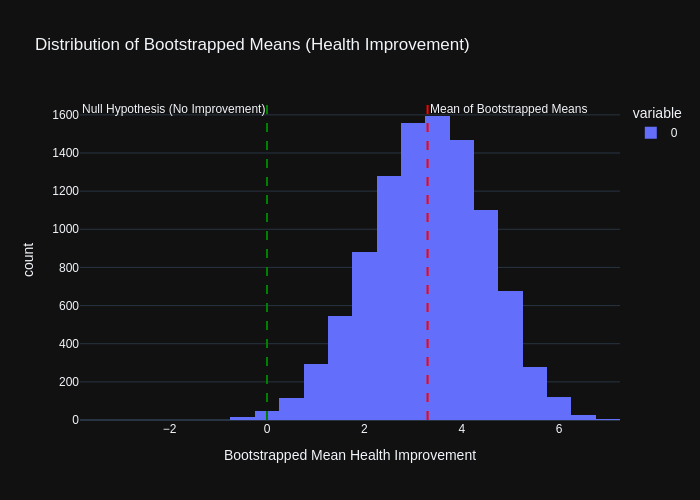

In [11]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Sample Data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Calculate Health Improvement
df['HealthImprovement'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plotting initial vs final health scores
fig = go.Figure()

# Add traces for initial and final health scores
fig.add_trace(go.Scatter(x=df['PatientID'], y=df['InitialHealthScore'], mode='lines+markers', name='Initial Health Score'))
fig.add_trace(go.Scatter(x=df['PatientID'], y=df['FinalHealthScore'], mode='lines+markers', name='Final Health Score'))

# Update layout
fig.update_layout(
    title='Initial vs Final Health Scores',
    xaxis_title='Patient ID',
    yaxis_title='Health Score',
    legend_title='Health Score Type',
    template='plotly_dark'
)

# Show plot
fig.show(renderer="png")

# Bootstrapping Function
def bootstrap_mean(data, n_iterations=10000):
    boot_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.array(boot_means)

# Performing bootstrapping
boot_means = bootstrap_mean(df['HealthImprovement'].values)

# Plotting the distribution of bootstrapped means
hist_fig = px.histogram(boot_means, nbins=30, title='Distribution of Bootstrapped Means (Health Improvement)',
                        labels={'value': 'Bootstrapped Mean Health Improvement'}, template='plotly_dark')

# Adding lines for the mean of bootstrapped means and null hypothesis
hist_fig.add_vline(x=np.mean(boot_means), line_dash="dash", line_color="red", annotation_text="Mean of Bootstrapped Means", annotation_position="top right")
hist_fig.add_vline(x=0, line_dash="dash", line_color="green", annotation_text="Null Hypothesis (No Improvement)", annotation_position="top left")

# Show plot
hist_fig.show(renderer="png")

**Key Findings:**

The mean bootstrapped health improvement is approximately 3.31.
The 95% confidence interval for the mean health improvement is between 0.9 and 5.6.

**Conclusion:**

Since the confidence interval for health improvement does not include zero, we can reject the null hypothesis. This suggests that the vaccine likely had a positive effect on the patients' health, as there is a statistically significant improvement in health scores.

**(9).**

yes.